# Initial Experiments with Complex Synapses
- Single complex neuron, Oja rule, input statistics follows a "white" and global random variation.

In [8]:
%load_ext autoreload
%autoreload 2

import numpy as np 
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy.random as random
from neuron import Neuron, Log
from simulation import Simulator
from functions import get_combinations
from collections import namedtuple
from collections import OrderedDict


plt.rcParams.update({'font.size': 14})
pltaspect = (4,3)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
neuron_parameters = OrderedDict(
    N = [10],
    S = [10],
    tau_W=[30],
    beta = [1],
    n = [2]
)

neurons = []
for p in get_combinations(neuron_parameters):
    neurons.append(Neuron(p.N, p.S, p.tau_W, p.beta, p.n))


In [3]:
timescales = neurons[0].tau_W * (-1) / np.linalg.eigvals(neurons[0].L)
timescales

array([3.74465749e+01, 1.95361228e+02, 8.70894911e+02, 3.66186586e+03,
       1.50037676e+04, 6.07275526e+04, 2.44335116e+05, 9.80247546e+05,
       3.65545165e+07, 4.02202392e+06])

The choice of `dt` in the next block is dependent on the time-scales shown here. Approx. 1 order of magnitude smaller than the fastest mode is usually sufficient.

In [4]:
env_parameters = OrderedDict(
    sigma = [1],
    epsilon = [0.1, 0.5, 2.5],
    # epsilon = [0.1],
    T_e = [100, 200, 500, 1000]
    # T_e = [100]
)

envs = []
for p in get_combinations(env_parameters):
    envs.append(Simulator(p.sigma, p.epsilon, p.T_e, dt=0.1))


It appears that value of $\epsilon$ also affects the choice of time-step length. Keeping all the other parameters same as before, a larger $\epsilon$ resulted in unstable runs (nan values), but the issue goes away when time-step length is reduced by 1 order.

In [5]:
trials = OrderedDict(
    neuron = neurons,
    env = envs
)

# run all the combinations available
for trial in get_combinations(trials):
    trial.env.run(trial.neuron, T=3*trial.env.T_e)





In [6]:
for neuron in neurons:
    print(neuron)

Properties: {'N': 10, 'S': 10, 'tau_W': 30, 'beta': 1, 'n': 2, 'alpha': 1}.
Trials: 
0: {'sigma': 1, 'epsilon': 0.1, 'T_e': 100, 'mode': 'block', 'T': 300, 'dt': 0.1}. 
1: {'sigma': 1, 'epsilon': 0.1, 'T_e': 200, 'mode': 'block', 'T': 600, 'dt': 0.1}. 
2: {'sigma': 1, 'epsilon': 0.1, 'T_e': 500, 'mode': 'block', 'T': 1500, 'dt': 0.1}. 
3: {'sigma': 1, 'epsilon': 0.1, 'T_e': 1000, 'mode': 'block', 'T': 3000, 'dt': 0.1}. 
4: {'sigma': 1, 'epsilon': 0.5, 'T_e': 100, 'mode': 'block', 'T': 300, 'dt': 0.1}. 
5: {'sigma': 1, 'epsilon': 0.5, 'T_e': 200, 'mode': 'block', 'T': 600, 'dt': 0.1}. 
6: {'sigma': 1, 'epsilon': 0.5, 'T_e': 500, 'mode': 'block', 'T': 1500, 'dt': 0.1}. 
7: {'sigma': 1, 'epsilon': 0.5, 'T_e': 1000, 'mode': 'block', 'T': 3000, 'dt': 0.1}. 
8: {'sigma': 1, 'epsilon': 2.5, 'T_e': 100, 'mode': 'block', 'T': 300, 'dt': 0.1}. 
9: {'sigma': 1, 'epsilon': 2.5, 'T_e': 200, 'mode': 'block', 'T': 600, 'dt': 0.1}. 
10: {'sigma': 1, 'epsilon': 2.5, 'T_e': 500, 'mode': 'block', 'T': 15

[ 0.19632747  0.20391867  0.23909946 ... -0.67407147 -0.68632141
 -0.71052168]
[0.03181287 0.04033488 0.02765051 ... 0.79069882 0.79329046 0.7864278 ]
[-0.08229407 -0.093923   -0.10174105 ...  0.89078985  0.88698731
  0.90490806]
[0.27628303 0.27400072 0.28309883 ... 0.44108569 0.44185672 0.44218474]


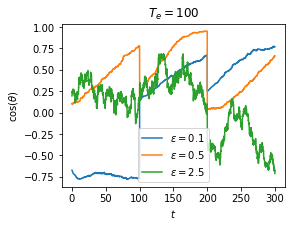

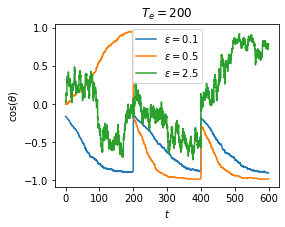

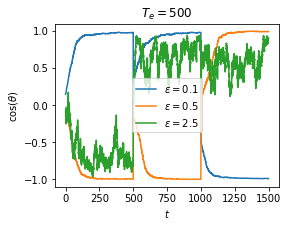

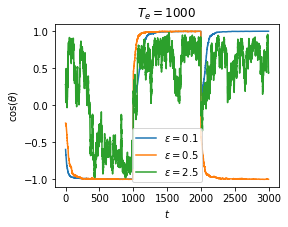

In [7]:
figures = {}
axs = {}

for neuron in neurons:
    for log in neuron.logs:
        if log.env_parameters['T_e'] not in figures:
            figures[log.env_parameters['T_e']], axs[log.env_parameters['T_e']] = plt.subplots(
                figsize=pltaspect
            )
            axs[log.env_parameters['T_e']].set_xlabel('$t$')
            axs[log.env_parameters['T_e']].set_ylabel('$\cos(\\theta)$')
            axs[log.env_parameters['T_e']].set_title(
                '$T_e =${}'.format(log.env_parameters['T_e'])
            )

        axs[log.env_parameters['T_e']].plot(
            log.timeline, 
            (log.w_para/log.w_norm), 
            label = '$\epsilon =${}'.format(log.env_parameters['epsilon']),
        )
        if log.env_parameters['epsilon'] == 2.5:
            print(log.w_para/log.w_norm)

for ax in axs.values():
    ax.legend()
        
    

In [ ]:
cm_section = np.linspace(0.2, 0.8, neurons[0].S)
colors = [ cm.Oranges(x) for x in cm_section ]


fig, ax = subplots()
for i in range(neurons[0].S):
    pass